In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [47]:
f = open('../checkpoints/2023-08-23_PCA-5-var-stepDecay/logs/logs.pkl', 'rb')
train_log = pickle.load(f)
train_log.keys()
print(np.array(train_log['train_metrics']).shape)


(3000, 3)


In [50]:
def plot_train(log, name):
    fig, ax = plt.subplots()
    if 'Loss' in name: 
        ax.plot(log['train_loss'], label='Train')
        ax.plot(log['val_loss'], label='Val')
    else:
        ax.plot(log['train_metrics'], label='Train')
        ax.plot(log['val_metrics'], label='Val')
    ax.set_box_aspect(1/1.62)
    ax.grid()
    ax.legend()
    ax.set_title(name)
    return fig

def plot_metrics(log):
    fig, ax = plt.subplots(1,3, figsize=(10,5))
    names = [r"$R^2$", "sMAPE", "rel-MSE"]
    tmetrics = np.array(log['train_metrics'])
    vmetrics = np.array(log['val_metrics'])
    for i, a in enumerate(ax):
        a.plot(tmetrics[:,i], label='Train')
        a.plot(vmetrics[:, i], label='Val')
        a.set_title(names[i])
        a.grid()
        a.set_box_aspect(1/1.61)
        a.legend()
    return fig

def plot_field(data):
    # data: 2D array
    fig, ax = plt.subplots()
    im=ax.imshow(data, cmap='seismic', aspect='auto', origin='lower')
    fig.colorbar(im)
    return fig

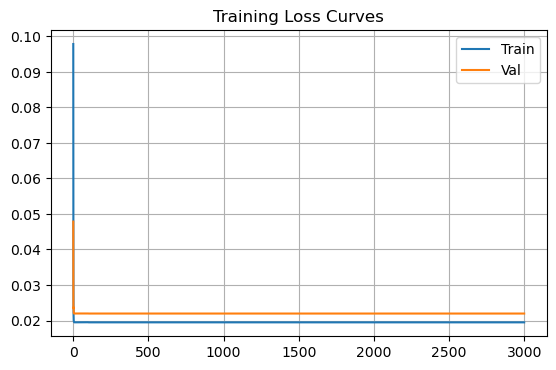

In [40]:
loss_plot = plot_train(train_log, 'Training Loss Curves')
plt.show()

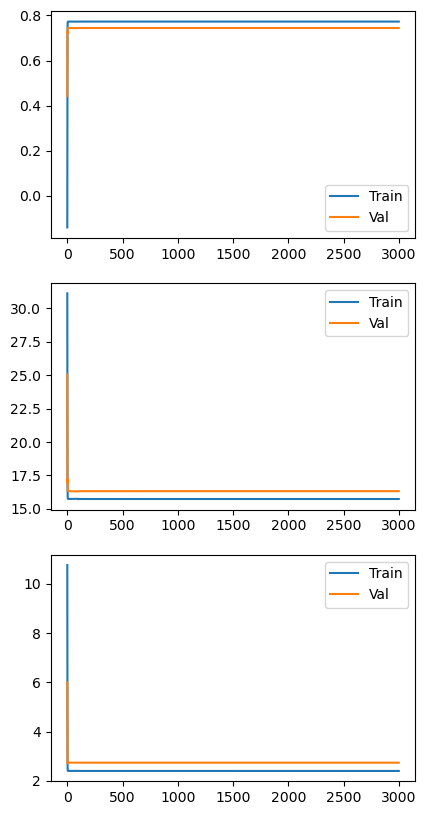

In [51]:
metric = plot_metrics(train_log)

In [22]:
import h5py
f = h5py.File('/pscratch/sd/y/yixuans/datatset/SOMA/varyGM/PCA_data.h5', 'r')
data = f['PCA_data'][:]

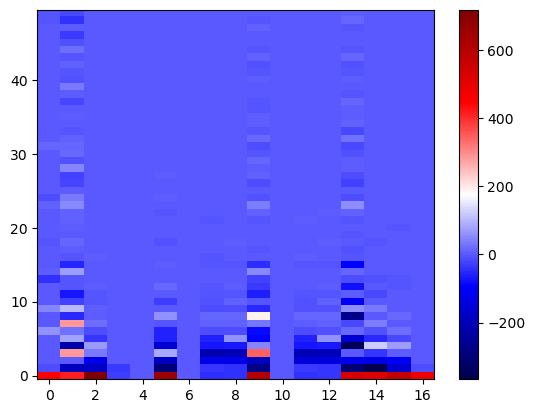

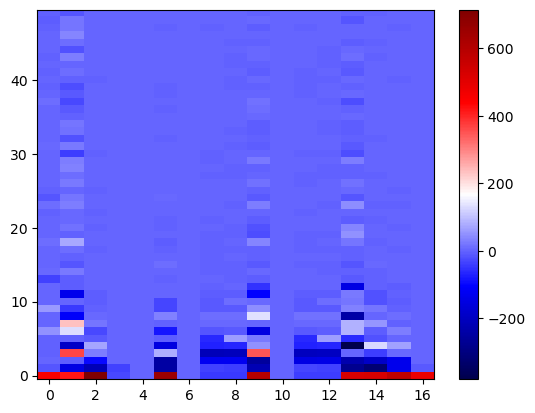

In [35]:
random_num = np.random.randint(data.shape[0])
field = plot_field(data[10])
field2 = plot_field(data[11])